# Spies In The Skies

BuzzFeed News obtained more than four months of aircraft transponder detections from the plane 
tracking website Flightradar24, covering August 17 to December 31, 2015 UTC, containing all data 
displayed on the site within a bounding box encompassing the continental United States, Alaska, Hawaii 
and Puerto Rico. Fightradar24 receives data from its network of ground-based receivers, supplemented 
by a feed from ground radars provided by the Federal Aviation Administration (FAA) with a five-minute 
delay.
After parsing from the raw files supplied by Flightradar24, the data included the following fields, 
for each transponder detection:

1. adshex Unique identifier for each aircraft, corresponding to its “Mode-S” code, in hexademical format.

2. flight_id Unique identifier for each “flight segment,” in hexadecimal format. A flight segment is a continuous series of transponder detections for one aircraft. There may be more than one segment    per flight, if a plane disappears from Flightradar24’s coverage for a period — for example when flying over rural areas with sparse receiver coverage. While being tracked by Fightradar24, surveillance planes were typically detected several times per minute.

3. latitude, longitude Geographic location in digital degrees.

4. altitude Altitude in feet.

5. speed Ground speed in knots.

6. track Compass bearing in degrees, with 0 corresponding to north.

7. squawk Four-digit code transmitted by the transponder.

8. type Aircraft model, if identified.

9. timestamp Full UTC timestamp.

We saved the data for each individual plane in a separate comma-separated values (CSV) file, named for 
the aircraft’s adshex Mode-S code.
From the FAA registration database, we identified aircraft registered to the Department of Homeland 
Security and companies previously identified as front operations for the FBI. Using the Mode-S 
hexadecimal codes for these planes, we imported the corresponding files from the Flightradar24 data 
into Python, and joined this to the FAA data to give the following additional fields:
name Name of aircraft registrant.

10. other_names1, other_names2 Other names for the registrant, if listed.

11. n_number Aircraft registration number, sometimes called a “tail number.” For U.S.-registered planes,these begin with the letter “N,” followed by up to five alphanumeric characters.

12. serial_number Identifying number assigned to the aircraft by its manufacturer.

13. mfr_mdl_code Code designating the manufacturer and model of the aircraft.

14. mfr Manufacturer.

15. model Aircraft model.

16. year_mfr Year in which aircraft was manufactured.

17. type_aircraft 4: fixed-wing single-engine, 5: fixed-wing multi-engine, 6: helicopter.agency Federal agency operating the aircraft, recorded by BuzzFeed News.

This data is spread across three files feds1.csv, feds2.csv, and feds3.csv, to keep file sizes small, 
which we then processed to create further calculated fields.


In [1]:
import pandas as pd
import numpy as np

In [2]:
# we have below three data set in csv file. we read all the three data set 
# reading feds1
feds1 = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Pandas CSV\Feds data set\feds1.csv")
feds1.head()

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,other_names1,other_names2,n_number,serial_number,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency
0,A72AA1,72791e8,33.25520,-117.91699,5499,111,137,4401,B350,2015-08-18T07:58:54Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs
1,A72AA1,72791e8,33.26590,-117.92800,5500,109,138,4401,B350,2015-08-18T07:58:39Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs
2,A72AA1,72791e8,33.27410,-117.93599,5500,109,137,4401,B350,2015-08-18T07:58:28Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs
3,A72AA1,72791e8,33.28251,-117.94500,5500,112,138,4401,B350,2015-08-18T07:58:13Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs
4,A72AA1,72791e8,33.29341,-117.95699,5500,102,134,4401,B350,2015-08-18T07:57:58Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs


In [3]:
feds2 = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Pandas CSV\Feds data set\feds2.csv")
feds2.head()

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,other_names1,other_names2,n_number,serial_number,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency
0,AC19C5,820b3d6,37.7099,-122.13699,4200,86,210,4414,C182,2015-11-30T18:31:03Z,...,NaN,NaN,879WM,18282216,2072703,CESSNA,182T,2010.0,4,fbi
1,A66B77,7e6ca95,31.6178,-111.85100,10300,143,105,4406,T206,2015-11-06T04:26:44Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,51216,T20608343,2073303,CESSNA,T206H,NaN,4,dhs
2,AC19C5,7b8e8c8,37.4119,-121.84400,2400,99,357,0,C182,2015-10-16T19:06:17Z,...,NaN,NaN,879WM,18282216,2072703,CESSNA,182T,2010.0,4,fbi
3,A66B77,7e6ca95,31.6201,-111.85899,10325,141,108,4406,T206,2015-11-06T04:26:32Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,51216,T20608343,2073303,CESSNA,T206H,NaN,4,dhs
4,A8A872,7a3b3cd,33.9218,-117.89600,5400,105,253,4414,C182,2015-10-08T00:43:12Z,...,NaN,NaN,657TP,18282253,2072703,CESSNA,182T,2010.0,4,fbi


In [4]:
feds3 =  pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Pandas CSV\Feds data set\feds3.csv")
feds3.head()

C:\Users\dell\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,other_names1,other_names2,n_number,serial_number,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency
0,A37D92,761afe3,45.11240,-93.46159,4500,91,350,4414,NaN,2015-09-10T14:02:06Z,...,NaN,NaN,324EB,20608190,2073301,CESSNA,206H,2003.0,4,fbi
1,A2EC92,820b1fa,45.26361,-122.69700,4275,128,162,4414,T206,2015-11-30T18:13:04Z,...,NaN,NaN,288JY,T20608913,2073303,CESSNA,T206H,2009.0,4,fbi
2,A7EEC5,8447898,33.83720,-118.30700,8500,100,306,0,C206,2015-12-14T22:34:42Z,...,NaN,NaN,610AG,20608324,2073301,CESSNA,206H,2010.0,4,fbi
3,AC97AB,8119cff,40.13330,-75.16549,4125,137,163,4414,C182,2015-11-24T12:42:48Z,...,NaN,NaN,910LF,18282284,2072703,CESSNA,182T,2011.0,4,fbi
4,AC9E93,7ee2f6c,40.99920,-73.75239,5000,109,39,4312,C182,2015-11-09T15:04:08Z,...,NaN,NaN,912EX,18282231,2072703,CESSNA,182T,2010.0,4,fbi


In [5]:
# shape of above 3 feds file
print(feds1.shape)
print(feds2.shape)
print(feds3.shape)

(397040, 21)
(395633, 21)
(449671, 21)


In [6]:
# we have similar columns in all the three files let us merge them 
frames = [feds1,feds2,feds3]
feds = pd.concat(frames)

In [7]:
feds.shape # we have our new feds file will all above dataframes joined row wise

(1242344, 21)

In [8]:
# let us now explore the data
feds.columns

Index(['adshex', 'flight_id', 'latitude', 'longitude', 'altitude', 'speed',
       'track', 'squawk', 'type', 'timestamp', 'name', 'other_names1',
       'other_names2', 'n_number', 'serial_number', 'mfr_mdl_code', 'mfr',
       'model', 'year_mfr', 'type_aircraft', 'agency'],
      dtype='object')

In [9]:
# we have columns other_names1 and other_names2. These are the registrant names on which they are registered.
# we have so null values in them
print(feds['other_names1'].isnull().sum())
print(feds['other_names2'].isnull().sum())

835631
871787


######  For other_names1 most we have 83% planes registered under US CUSTOMS & BORDER PROTECTION. for other_names2 we have 98% of them registered under OFFICE OF AIR & MARINE. we can go ahead and impute the missing values with the most registered planes. 

In [10]:
print(feds['other_names1'].value_counts(normalize = True))
print(feds['other_names2'].value_counts(normalize = True))


US CUSTOMS & BORDER PROTECTION                        0.837291
CUSTOMS AND BORDER PROTECTION                         0.039197
US CUSTOMS AND BORDER PROTECTION                      0.037476
U S CUSTOMS & BORDER PROTECTION                       0.036842
CUSTOMS & BORDER PROTECTION                           0.034309
OFFICE OF AIR & WATER                                 0.010223
OFFICE OF AIR & MARINE                                0.001994
OFFICE OF AIR AND MARINE                              0.001335
US CUSTOMS AND BORDER PATROL                          0.000762
PROTECTION                                            0.000568
US CUSTOMS & BORDER PROTECTION       INE OPERATION    0.000002
Name: other_names1, dtype: float64
OFFICE OF AIR & MARINE              0.984966
C/O GREG KENNEY                     0.010411
ATTN: FREDERICK LEISLING            0.003832
AIR AND MARINE OPERATIONS           0.000483
AIR & MARINE OPERATIONS             0.000270
OFFICE OF AIR AND MARINE            0.000024
OF

In [11]:
feds['other_names1'].mode()[0]

'US CUSTOMS & BORDER PROTECTION'

In [12]:
feds['other_names2'].mode()[0]

'OFFICE OF AIR & MARINE'

In [13]:
# we go ahead and impute both of them with their respective modes

feds['other_names1'].fillna(feds['other_names1'].mode()[0], inplace=True)
feds['other_names2'].fillna(feds['other_names2'].mode()[0], inplace=True)

print(feds['other_names1'].isnull().sum())
print(feds['other_names2'].isnull().sum())

# We dont have any null values in them. 

0
0


In [14]:
# let us see if we have any duplicate rows since its a time stamp data
feds[feds.duplicated()]

# There are certainly duplicated values in the columns but doesn't look like we have alike rows here.
# The timestamp are different though it shows the same minute but the different seconds unit.

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,other_names1,other_names2,n_number,serial_number,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency
141553,A6718E,7717291,32.7358,-117.0900,5425,83,269,4415,C182,2015-09-16T23:59:59Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,514NY,18282271,2072703,CESSNA,182T,2010.0,4,fbi
141586,A59D5B,7717b5c,40.7262,-73.9915,5175,94,221,4311,C182,2015-09-16T23:58:42Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,461AJ,18282225,2072703,CESSNA,182T,2010.0,4,fbi
141601,A6718E,7717291,32.6861,-117.0680,5425,63,83,4415,C182,2015-09-16T23:57:59Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,514NY,18282271,2072703,CESSNA,182T,2010.0,4,fbi
141603,A846DD,77175f7,38.8275,-77.2637,7199,80,288,4414,C182,2015-09-16T23:57:54Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,632TK,18282188,2072703,CESSNA,182T,2009.0,4,fbi
141608,A4D817,771931f,35.2717,-81.1330,5175,48,11,353,C182,2015-09-16T23:57:44Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,411CP,18282232,2072703,CESSNA,182T,2010.0,4,fbi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423804,A8464D,7c4432c,38.7291,-77.3670,2125,102,74,0,C182,2015-10-21T20:17:28Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,632MR,18282186,2072703,CESSNA,182T,2009.0,4,fbi
423900,A37A7D,85bec9a,28.2731,-82.4987,5300,114,131,224,C182,2015-12-24T22:29:34Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,323LP,18282244,2072703,CESSNA,182T,2010.0,4,fbi
424315,A8464D,7c4432c,38.9071,-76.9885,8175,107,279,4415,C182,2015-10-21T22:09:02Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,632MR,18282186,2072703,CESSNA,182T,2009.0,4,fbi
424320,A4BC6E,7c6b043,33.8560,-117.9480,5550,105,290,4414,C182,2015-10-22T22:09:04Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,404KR,18282203,2072703,CESSNA,182T,2009.0,4,fbi


In [15]:
feds.info() # we have so columns which has null values here type, year_mfr

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242344 entries, 0 to 449670
Data columns (total 21 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   adshex         1242344 non-null  object 
 1   flight_id      1242344 non-null  object 
 2   latitude       1242344 non-null  float64
 3   longitude      1242344 non-null  float64
 4   altitude       1242344 non-null  int64  
 5   speed          1242344 non-null  int64  
 6   track          1242344 non-null  int64  
 7   squawk         1242344 non-null  int64  
 8   type           1121859 non-null  object 
 9   timestamp      1242344 non-null  object 
 10  name           1242344 non-null  object 
 11  other_names1   1242344 non-null  object 
 12  other_names2   1242344 non-null  object 
 13  n_number       1242344 non-null  object 
 14  serial_number  1242344 non-null  object 
 15  mfr_mdl_code   1242344 non-null  int64  
 16  mfr            1242344 non-null  object 
 17  model    

In [16]:
# let us check the type column
print(feds.type.isnull().sum())
print(feds.type.value_counts(normalize = True))

120485
C182    0.392662
T206    0.278525
AS50    0.075967
C206    0.071095
PC12    0.069611
C208    0.041451
B350    0.031171
UH1     0.011058
B407    0.009323
DH8C    0.006415
S76     0.005524
BE20    0.005142
DH8B    0.001307
P8      0.000723
P32R    0.000016
B412    0.000005
PA32    0.000004
Name: type, dtype: float64


In [17]:
# we dont have type of aircraft for below. There are different aircraft for the same adshex.
feds[feds['type'].isnull()]

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,other_names1,other_names2,n_number,serial_number,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency
76,A68BE9,72773c7,32.16711,-110.98900,4300,0,73,0,NaN,2015-08-18T05:59:38Z,...,U S CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,5204Y,3101,8680950,EUROCOPTER,AS 350 B2,1998.0,6,dhs
108,A68BE9,727329e,32.08411,-110.99700,3900,50,231,0,NaN,2015-08-18T02:46:42Z,...,U S CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,5204Y,3101,8680950,EUROCOPTER,AS 350 B2,1998.0,6,dhs
112,A68BE9,727329e,32.15961,-110.95199,3500,50,231,0,NaN,2015-08-18T02:43:26Z,...,U S CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,5204Y,3101,8680950,EUROCOPTER,AS 350 B2,1998.0,6,dhs
114,A68BE9,727329e,32.16410,-110.94600,3500,50,231,0,NaN,2015-08-18T02:42:47Z,...,U S CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,5204Y,3101,8680950,EUROCOPTER,AS 350 B2,1998.0,6,dhs
255,A4913C,726ee4e,32.86540,-96.86379,1600,86,9,450,NaN,2015-08-18T00:04:33Z,...,CUSTOMS AND BORDER PROTECTION,OFFICE OF AIR & MARINE,3937A,4796,1145002,AMERICAN EUROCOPTER LLC,AS350B3,2009.0,6,dhs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449666,A15B00,7f08458,44.99260,-93.95280,5150,82,317,0,NaN,2015-11-10T14:47:25Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,187DH,T20609187,2073343,TEXTRON AVIATION INC,T206H,2015.0,4,fbi
449667,A15B00,810342e,44.83780,-92.77760,3399,130,206,1200,NaN,2015-11-23T20:21:53Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,187DH,T20609187,2073343,TEXTRON AVIATION INC,T206H,2015.0,4,fbi
449668,A15B00,808907d,44.86761,-93.80970,7025,60,311,4264,NaN,2015-11-20T13:45:29Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,187DH,T20609187,2073343,TEXTRON AVIATION INC,T206H,2015.0,4,fbi
449669,A15B00,810342e,44.79891,-92.48150,4050,130,13,0,NaN,2015-11-23T20:00:03Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,187DH,T20609187,2073343,TEXTRON AVIATION INC,T206H,2015.0,4,fbi


In [18]:
feds['type'].value_counts(normalize = True)
# we  have flight counts for each aircraft. C182 aircraft at 39% and T206 AT 27% .


C182    0.392662
T206    0.278525
AS50    0.075967
C206    0.071095
PC12    0.069611
C208    0.041451
B350    0.031171
UH1     0.011058
B407    0.009323
DH8C    0.006415
S76     0.005524
BE20    0.005142
DH8B    0.001307
P8      0.000723
P32R    0.000016
B412    0.000005
PA32    0.000004
Name: type, dtype: float64

In [19]:
feds['type'].mode()

0    C182
dtype: object

In [20]:
# we will just impute C182 for all the missing values here 
feds['type'].fillna(feds['type'].mode()[0], inplace=True)


In [21]:
# let us check the null values now in type
feds['type'].isnull().sum()

0

In [22]:
# we have below null values in year_mfr
feds[feds['year_mfr'].isnull()]

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,other_names1,other_names2,n_number,serial_number,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency
2330,ACAEF9,7262c8e,40.26030,-77.33649,8850,75,280,2637,C182,2015-08-17T18:23:56Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,916WR,18282262,2072703,CESSNA,182T,NaN,4,fbi
2339,ACAEF9,7262c8e,40.25780,-77.31259,8850,75,280,2637,C182,2015-08-17T18:23:16Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,916WR,18282262,2072703,CESSNA,182T,NaN,4,fbi
2342,ACAEF9,7262c8e,40.25600,-77.29980,8850,66,282,2637,C182,2015-08-17T18:22:56Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,916WR,18282262,2072703,CESSNA,182T,NaN,4,fbi
2349,ACAEF9,7262c8e,40.25281,-77.25990,8850,66,282,2637,C182,2015-08-17T18:22:26Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,916WR,18282262,2072703,CESSNA,182T,NaN,4,fbi
2364,ACAEF9,7262c8e,40.25140,-77.21660,8825,66,282,2637,C182,2015-08-17T18:21:06Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,916WR,18282262,2072703,CESSNA,182T,NaN,4,fbi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424503,A9C038,7e313dc,26.26370,-98.48449,775,103,285,0,UH1,2015-11-04T14:53:29Z,...,US CUSTOMS AND BORDER PROTECTION,OFFICE OF AIR & MARINE,7272N,160452,1181425,BELL,UH-1N,NaN,6,dhs
424507,ACA29B,78ddf92,38.65600,-121.45800,6575,95,278,4414,T206,2015-09-28T20:21:14Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,913JC,T20609109,2073303,CESSNA,T206H,NaN,4,fbi
424508,A66B77,7e57274,31.93100,-111.36800,7225,107,24,4406,T206,2015-11-05T18:03:09Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,51216,T20608343,2073303,CESSNA,T206H,NaN,4,dhs
424541,A66B77,83a8fcd,32.47330,-111.21800,3725,116,289,424,T206,2015-12-10T16:29:48Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,51216,T20608343,2073303,CESSNA,T206H,NaN,4,dhs


In [23]:
feds['year_mfr'].value_counts() # most of the manufacturing is in 2010 following 2009 . we can impute
# 2010 for all the missing values.
print(feds['year_mfr'].mode()[0])

2010.0


In [24]:
feds['year_mfr'].fillna(feds['year_mfr'].mode()[0], inplace=True)


In [25]:
# let us now check for missing values in year_mfr
feds['year_mfr'].isnull().sum()

0

In [26]:
# Now we have all the columns with no missing values . 
print(feds.info())
print(feds.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242344 entries, 0 to 449670
Data columns (total 21 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   adshex         1242344 non-null  object 
 1   flight_id      1242344 non-null  object 
 2   latitude       1242344 non-null  float64
 3   longitude      1242344 non-null  float64
 4   altitude       1242344 non-null  int64  
 5   speed          1242344 non-null  int64  
 6   track          1242344 non-null  int64  
 7   squawk         1242344 non-null  int64  
 8   type           1242344 non-null  object 
 9   timestamp      1242344 non-null  object 
 10  name           1242344 non-null  object 
 11  other_names1   1242344 non-null  object 
 12  other_names2   1242344 non-null  object 
 13  n_number       1242344 non-null  object 
 14  serial_number  1242344 non-null  object 
 15  mfr_mdl_code   1242344 non-null  int64  
 16  mfr            1242344 non-null  object 
 17  model    

In [27]:
feds.head()

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,other_names1,other_names2,n_number,serial_number,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency
0,A72AA1,72791e8,33.25520,-117.91699,5499,111,137,4401,B350,2015-08-18T07:58:54Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs
1,A72AA1,72791e8,33.26590,-117.92800,5500,109,138,4401,B350,2015-08-18T07:58:39Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs
2,A72AA1,72791e8,33.27410,-117.93599,5500,109,137,4401,B350,2015-08-18T07:58:28Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs
3,A72AA1,72791e8,33.28251,-117.94500,5500,112,138,4401,B350,2015-08-18T07:58:13Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs
4,A72AA1,72791e8,33.29341,-117.95699,5500,102,134,4401,B350,2015-08-18T07:57:58Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs


In [28]:
feds['latitude']

0         33.25520
1         33.26590
2         33.27410
3         33.28251
4         33.29341
            ...   
449666    44.99260
449667    44.83780
449668    44.86761
449669    44.79891
449670    44.66590
Name: latitude, Length: 1242344, dtype: float64

In [29]:
[feds['latitude'], feds['longitude']]

[0         33.25520
 1         33.26590
 2         33.27410
 3         33.28251
 4         33.29341
             ...   
 449666    44.99260
 449667    44.83780
 449668    44.86761
 449669    44.79891
 449670    44.66590
 Name: latitude, Length: 1242344, dtype: float64,
 0        -117.91699
 1        -117.92800
 2        -117.93599
 3        -117.94500
 4        -117.95699
             ...    
 449666    -93.95280
 449667    -92.77760
 449668    -93.80970
 449669    -92.48150
 449670    -92.95289
 Name: longitude, Length: 1242344, dtype: float64]

In [30]:
feds.head()

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,other_names1,other_names2,n_number,serial_number,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency
0,A72AA1,72791e8,33.25520,-117.91699,5499,111,137,4401,B350,2015-08-18T07:58:54Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs
1,A72AA1,72791e8,33.26590,-117.92800,5500,109,138,4401,B350,2015-08-18T07:58:39Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs
2,A72AA1,72791e8,33.27410,-117.93599,5500,109,137,4401,B350,2015-08-18T07:58:28Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs
3,A72AA1,72791e8,33.28251,-117.94500,5500,112,138,4401,B350,2015-08-18T07:58:13Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs
4,A72AA1,72791e8,33.29341,-117.95699,5500,102,134,4401,B350,2015-08-18T07:57:58Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs


In [31]:
# we are now going to import geopandas and matplotlib to under the visualization for these latitudes
# and longitudes

import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [32]:
# Here we have created geometry column for the coordinates 
gdf = geopandas.GeoDataFrame(
    feds, geometry=geopandas.points_from_xy(feds.longitude,feds.latitude))
print(gdf.head())

   adshex flight_id  latitude  longitude  altitude  speed  track  squawk  \
0  A72AA1   72791e8  33.25520 -117.91699      5499    111    137    4401   
1  A72AA1   72791e8  33.26590 -117.92800      5500    109    138    4401   
2  A72AA1   72791e8  33.27410 -117.93599      5500    109    137    4401   
3  A72AA1   72791e8  33.28251 -117.94500      5500    112    138    4401   
4  A72AA1   72791e8  33.29341 -117.95699      5500    102    134    4401   

   type             timestamp  ...            other_names2 n_number  \
0  B350  2015-08-18T07:58:54Z  ...  OFFICE OF AIR & MARINE     561A   
1  B350  2015-08-18T07:58:39Z  ...  OFFICE OF AIR & MARINE     561A   
2  B350  2015-08-18T07:58:28Z  ...  OFFICE OF AIR & MARINE     561A   
3  B350  2015-08-18T07:58:13Z  ...  OFFICE OF AIR & MARINE     561A   
4  B350  2015-08-18T07:57:58Z  ...  OFFICE OF AIR & MARINE     561A   

  serial_number mfr_mdl_code                     mfr  model year_mfr  \
0         FM-36      4220012  HAWKER BEECHCR

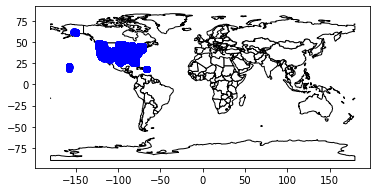

In [33]:
# These are the specific location for the coordinates in the dataset
# we have our world map here 
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='blue')

plt.show()

In [34]:
feds.head()

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,other_names2,n_number,serial_number,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency,geometry
0,A72AA1,72791e8,33.25520,-117.91699,5499,111,137,4401,B350,2015-08-18T07:58:54Z,...,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs,POINT (-117.91699 33.25520)
1,A72AA1,72791e8,33.26590,-117.92800,5500,109,138,4401,B350,2015-08-18T07:58:39Z,...,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs,POINT (-117.92800 33.26590)
2,A72AA1,72791e8,33.27410,-117.93599,5500,109,137,4401,B350,2015-08-18T07:58:28Z,...,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs,POINT (-117.93599 33.27410)
3,A72AA1,72791e8,33.28251,-117.94500,5500,112,138,4401,B350,2015-08-18T07:58:13Z,...,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs,POINT (-117.94500 33.28251)
4,A72AA1,72791e8,33.29341,-117.95699,5500,102,134,4401,B350,2015-08-18T07:57:58Z,...,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs,POINT (-117.95699 33.29341)


In [35]:
# to understand the altitute here we can create bins to check the frequency of the altitutes. 
feds[feds['altitude'] > 30000]

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,other_names2,n_number,serial_number,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency,geometry
26032,AAA42F,737809a,40.15240,-84.27740,32050,234,202,7416,C182,2015-08-24T14:04:13Z,...,OFFICE OF AIR & MARINE,785MC,BJ-14,1152898,BEECH,A200C,2010.0,5,dhs,POINT (-84.27740 40.15240)
83479,A6DCEA,74ed730,33.90841,-117.28000,30975,116,148,146,PC12,2015-09-02T20:07:26Z,...,OFFICE OF AIR & MARINE,541PB,541,7090551,PILATUS,PC-12/45,2004.0,4,dhs,POINT (-117.28000 33.90841)
83481,A6DCEA,74ed730,33.94101,-117.30099,38950,99,211,146,PC12,2015-09-02T20:06:31Z,...,OFFICE OF AIR & MARINE,541PB,541,7090551,PILATUS,PC-12/45,2004.0,4,dhs,POINT (-117.30099 33.94101)
188041,A62B61,77fdab8,36.90730,-121.07000,33475,256,145,6330,PC12,2015-09-22T23:37:13Z,...,OFFICE OF AIR & MARINE,497PC,497,7090551,PILATUS,PC-12/45,2003.0,4,dhs,POINT (-121.07000 36.90730)
214631,A6DCEA,79021b9,33.53290,-117.91400,33450,157,301,2075,PC12,2015-09-29T17:52:33Z,...,OFFICE OF AIR & MARINE,541PB,541,7090551,PILATUS,PC-12/45,2004.0,4,dhs,POINT (-117.91400 33.53290)
215845,A9717A,78fb6c4,39.97260,-88.69660,32775,224,262,1545,BE20,2015-09-29T15:39:57Z,...,OFFICE OF AIR & MARINE,7074G,BC-17,1152921,BEECH,A200,2010.0,5,dhs,POINT (-88.69660 39.97260)
227405,AAA42F,737809a,40.21321,-84.24410,31525,229,201,7416,C182,2015-08-24T14:03:08Z,...,OFFICE OF AIR & MARINE,785MC,BJ-14,1152898,BEECH,A200C,2010.0,5,dhs,POINT (-84.24410 40.21321)
240812,A9717A,78fb6c4,39.96940,-88.74820,30575,227,259,1545,BE20,2015-09-29T15:40:32Z,...,OFFICE OF AIR & MARINE,7074G,BC-17,1152921,BEECH,A200,2010.0,5,dhs,POINT (-88.74820 39.96940)
261546,A9717A,7a81aec,29.71990,-96.32570,33525,264,263,4552,BE20,2015-10-09T18:19:32Z,...,OFFICE OF AIR & MARINE,7074G,BC-17,1152921,BEECH,A200,2010.0,5,dhs,POINT (-96.32570 29.71990)
269792,A9717A,7a81aec,29.71470,-96.36800,35700,225,260,4552,BE20,2015-10-09T18:20:07Z,...,OFFICE OF AIR & MARINE,7074G,BC-17,1152921,BEECH,A200,2010.0,5,dhs,POINT (-96.36800 29.71470)


In [36]:
feds.altitude.max()

60200

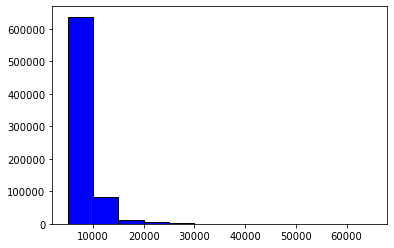

In [37]:
import matplotlib.pyplot as plt
plt.hist(feds['altitude'], bins = [5000,10000,15000,20000,25000,30000,40000,45000,50000,55000,60000,65000],edgecolor='black',color='b')

plt.show()

# most of the activity is done under 10,000 ft. 

In [38]:
feds['type'].value_counts()

# we have below aircrafts

C182    560996
T206    312466
AS50     85224
C206     79759
PC12     78094
C208     46502
B350     34970
UH1      12406
B407     10459
DH8C      7197
S76       6197
BE20      5769
DH8B      1466
P8         811
P32R        18
B412         6
PA32         4
Name: type, dtype: int64

In [39]:
# we have 29 planes give us data.  
feds.groupby('mfr_mdl_code').first()

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,other_names1,other_names2,n_number,serial_number,mfr,model,year_mfr,type_aircraft,agency,geometry
mfr_mdl_code,,,,,,,,,,,,,,,,,,,,,
1145002,A4913C,726ee4e,32.86540,-96.86379,1600,86,9,450,C182,2015-08-18T00:04:33Z,...,CUSTOMS AND BORDER PROTECTION,OFFICE OF AIR & MARINE,3937A,4796,AMERICAN EUROCOPTER LLC,AS350B3,2009.0,6,dhs,POINT (-96.86379 32.86540)
1145004,A9479C,726cbfc,39.08740,-76.81289,950,115,232,0,C182,2015-08-17T22:50:46Z,...,CUSTOMS AND BORDER PROTECTION,OFFICE OF AIR & MARINE,6974A,7459,AMERICAN EUROCOPTER CORP,AS350B3,2012.0,6,dhs,POINT (-76.81289 39.08740)
1152898,AAA42F,737809a,32.18191,-86.33080,26000,202,191,7416,C182,2015-08-24T16:02:30Z,...,US CUSTOMS AND BORDER PATROL,OFFICE OF AIR & MARINE,785MC,BJ-14,BEECH,A200C,2010.0,5,dhs,POINT (-86.33080 32.18191)
1152921,A9717A,728862e,29.84220,-99.79749,16600,219,336,4404,BE20,2015-08-18T16:26:51Z,...,U S CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,7074G,BC-17,BEECH,A200,2010.0,5,dhs,POINT (-99.79749 29.84220)
1181407,A9B9D0,7def126,30.12920,-97.99969,3499,200,357,4405,C182,2015-11-02T20:28:10Z,...,US CUSTOMS AND BORDER PROTECTION,OFFICE OF AIR AND MARINE,72595,73-21769,BELL,UH-1H,2010.0,6,dhs,POINT (-97.99969 30.12920)
1181425,A9B933,72bb3e6,26.17930,-98.23690,0,0,104,0,C182,2015-08-19T21:13:01Z,...,US CUSTOMS AND BORDER PROTECTION,OFFICE OF AIR & MARINE,7255N,160170,BELL,UH-1N,2010.0,6,dhs,POINT (-98.23690 26.17930)
1182154,A83822,72666ad,38.72950,-77.51520,75,2,243,4414,B407,2015-08-17T19:52:06Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,629ET,54382,BELL HELICOPTER TEXTRON CANADA,407,2012.0,6,fbi,POINT (-77.51520 38.72950)
1182202,AB74CC,72e2cb8,39.71851,-104.92899,5700,46,152,4415,C182,2015-08-20T19:16:15Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,83700,36208,BELL,412,1998.0,6,fbi,POINT (-104.92899 39.71851)
1182205,A1ECF1,7d8666b,38.73680,-77.19420,900,109,35,0,B412,2015-10-30T16:35:55Z,...,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,223JC,36106,BELL,412EP,1995.0,6,fbi,POINT (-77.19420 38.73680)


In [40]:
feds.groupby('mfr_mdl_code').count()

# Below we see here that the most number of data collected is from '2072703' , '2073303'

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,other_names1,other_names2,n_number,serial_number,mfr,model,year_mfr,type_aircraft,agency,geometry
mfr_mdl_code,,,,,,,,,,,,,,,,,,,,,
1145002,25729,25729,25729,25729,25729,25729,25729,25729,25729,25729,...,25729,25729,25729,25729,25729,25729,25729,25729,25729,25729
1145004,46918,46918,46918,46918,46918,46918,46918,46918,46918,46918,...,46918,46918,46918,46918,46918,46918,46918,46918,46918,46918
1152898,310,310,310,310,310,310,310,310,310,310,...,310,310,310,310,310,310,310,310,310,310
1152921,6722,6722,6722,6722,6722,6722,6722,6722,6722,6722,...,6722,6722,6722,6722,6722,6722,6722,6722,6722,6722
1181407,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1181425,15232,15232,15232,15232,15232,15232,15232,15232,15232,15232,...,15232,15232,15232,15232,15232,15232,15232,15232,15232,15232
1182154,6694,6694,6694,6694,6694,6694,6694,6694,6694,6694,...,6694,6694,6694,6694,6694,6694,6694,6694,6694,6694
1182202,137,137,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137
1182205,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [41]:
# we have creted below three coloumns from the timestamp date, month and year
feds['Date'] = pd.DatetimeIndex(feds['timestamp']).day
feds['Month'] = pd.DatetimeIndex(feds['timestamp']).month
feds['year'] = pd.DatetimeIndex(feds['timestamp']).year

In [42]:
feds.head()

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency,geometry,Date,Month,year
0,A72AA1,72791e8,33.25520,-117.91699,5499,111,137,4401,B350,2015-08-18T07:58:54Z,...,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs,POINT (-117.91699 33.25520),18,8,2015
1,A72AA1,72791e8,33.26590,-117.92800,5500,109,138,4401,B350,2015-08-18T07:58:39Z,...,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs,POINT (-117.92800 33.26590),18,8,2015
2,A72AA1,72791e8,33.27410,-117.93599,5500,109,137,4401,B350,2015-08-18T07:58:28Z,...,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs,POINT (-117.93599 33.27410),18,8,2015
3,A72AA1,72791e8,33.28251,-117.94500,5500,112,138,4401,B350,2015-08-18T07:58:13Z,...,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs,POINT (-117.94500 33.28251),18,8,2015
4,A72AA1,72791e8,33.29341,-117.95699,5500,102,134,4401,B350,2015-08-18T07:57:58Z,...,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs,POINT (-117.95699 33.29341),18,8,2015


In [43]:
pd.crosstab(feds['Month'], feds['mfr_mdl_code'])

mfr_mdl_code,1145002,1145004,1152898,1152921,1181407,1181425,1182154,1182202,1182205,1182206,...,4220012,4220031,5260217,7090551,7103218,8141827,8143007,8680950,8680951,8680954
Month,,,,,,,,,,,,,,,,,,,,,
8,6020,3007,310,2625,0,2177,419,30,0,30,...,6232,0,135,8709,0,0,118,1710,435,2508
9,6357,20635,0,1820,0,3032,247,62,0,154,...,9685,10,495,16864,0,1,3804,1463,0,7825
10,3732,5739,0,614,0,7893,3015,0,6,778,...,6309,0,94,14011,0,0,713,591,191,1335
11,6996,5535,0,895,9,2130,2302,45,0,2191,...,11079,156,478,17794,45,0,1180,1678,766,3943
12,2624,12002,0,768,0,0,711,0,0,634,...,1809,178,152,20716,22,0,500,2474,88,2592


In [44]:
pd.crosstab(feds['year_mfr'], feds['mfr_mdl_code'])

mfr_mdl_code,1145002,1145004,1152898,1152921,1181407,1181425,1182154,1182202,1182205,1182206,...,4220012,4220031,5260217,7090551,7103218,8141827,8143007,8680950,8680951,8680954
year_mfr,,,,,,,,,,,,,,,,,,,,,
1987.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6315,0,0,0
1992.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,346,0
1993.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,327,0
1995.0,0,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
1996.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2240,0,0
1997.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,67,0,0,1264,0,0
1998.0,0,0,0,0,0,0,0,137,0,0,...,0,0,0,0,0,0,0,4412,0,0
2001.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,28577,0,0,0,0,0,0


In [45]:
pd.crosstab(feds['mfr'], feds['type_aircraft'])

type_aircraft,2,4,5,6
mfr,,,,
AMERICAN EUROCOPTER CORP,0,0,0,46918
AMERICAN EUROCOPTER LLC,2905,0,0,22824
BEECH,0,0,7032,0
BEECHCRAFT CORP,0,0,344,0
BELL,0,0,0,19171
BELL HELICOPTER TEXTRON CANADA,0,0,0,6694
BOMBARDIER INC,0,0,8664,0
CESSNA,0,978015,0,0
EUROCOPTER,5287,0,0,22312


In [46]:
pd.crosstab(feds['mfr_mdl_code'], feds['type_aircraft'])

type_aircraft,2,4,5,6
mfr_mdl_code,,,,
1145002,2905,0,0,22824
1145004,0,0,0,46918
1152898,0,0,310,0
1152921,0,0,6722,0
1181407,0,0,0,9
1181425,0,0,0,15232
1182154,0,0,0,6694
1182202,0,0,0,137
1182205,0,0,0,6


In [47]:
# Here we have the old aircraft SIKORSKY MODEL S-76 . MUST BE A GREAT PILOT
feds[feds['mfr_mdl_code'] == 8143007 ]

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency,geometry,Date,Month,year
6163,A0EBDC,729272c,38.7450,-77.48599,900,137,257,4401,S76,2015-08-18T21:08:44Z,...,8143007,SIKORSKY,S-76B,1987.0,6,dhs,POINT (-77.48599 38.74500),18,8,2015
6165,A0EBDC,729272c,38.7530,-77.43320,800,139,252,4401,S76,2015-08-18T21:07:35Z,...,8143007,SIKORSKY,S-76B,1987.0,6,dhs,POINT (-77.43320 38.75300),18,8,2015
6168,A0EBDC,729272c,38.7553,-77.41940,825,141,250,4401,S76,2015-08-18T21:07:20Z,...,8143007,SIKORSKY,S-76B,1987.0,6,dhs,POINT (-77.41940 38.75530),18,8,2015
6171,A0EBDC,729272c,38.7741,-77.35949,800,155,206,4401,S76,2015-08-18T21:05:54Z,...,8143007,SIKORSKY,S-76B,1987.0,6,dhs,POINT (-77.35949 38.77410),18,8,2015
6190,A0EBDC,729272c,38.9950,-77.15419,800,152,228,4401,S76,2015-08-18T20:59:38Z,...,8143007,SIKORSKY,S-76B,1987.0,6,dhs,POINT (-77.15419 38.99500),18,8,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423663,AB8FB2,7866367,40.7579,-74.01240,2800,89,12,4405,S76,2015-09-25T16:03:33Z,...,8143007,SIKORSKY,S-76B,1987.0,6,dhs,POINT (-74.01240 40.75790),25,9,2015
423733,AB8FB2,7896950,39.9240,-75.15500,4000,87,90,4405,S76,2015-09-26T20:53:49Z,...,8143007,SIKORSKY,S-76B,1987.0,6,dhs,POINT (-75.15500 39.92400),26,9,2015
423859,A2A0F4,77108f0,40.7702,-73.88220,900,139,244,4402,C182,2015-09-16T18:33:59Z,...,8143007,SIKORSKY,S-76B,1987.0,6,dhs,POINT (-73.88220 40.77020),16,9,2015
424294,AB8FB2,78d9763,39.9362,-76.69040,5400,151,240,0,S76,2015-09-28T16:22:37Z,...,8143007,SIKORSKY,S-76B,1987.0,6,dhs,POINT (-76.69040 39.93620),28,9,2015


In [48]:
# we will save above in a new data frame
sikorsky = feds[feds['mfr_mdl_code'] == 8143007 ]

                        geometry
6163  POINT (-77.48599 38.74500)
6165  POINT (-77.43320 38.75300)
6168  POINT (-77.41940 38.75530)
6171  POINT (-77.35949 38.77410)
6190  POINT (-77.15419 38.99500)


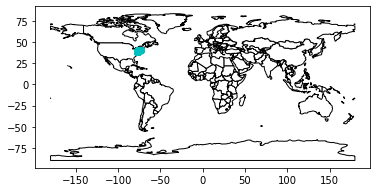

In [49]:
gdf = geopandas.GeoDataFrame(
    sikorsky.geometry)
print(gdf.head())
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='c')

plt.show()

# we have plotted the coordinates for SIKORSKY and it is focussed towards specific survillence area
#Hence forth we can plot other 28 aircraft to study the region.

In [50]:
grouped_feds = feds.groupby(['Date', 'Month', 'year'])
for key,item in grouped_feds:
    feds_group = grouped_feds.get_group(key)
    print(feds_group)

        adshex flight_id  latitude  longitude  altitude  speed  track  squawk  \
65926   A7EEBE   74afaa4  32.58360 -118.80499      6025    113    262    1006   
65927   A7EEBE   74afaa4  32.58921 -118.76199      6025    113    262    1006   
65928   A7EEBE   74afaa4  32.60860 -118.61799      6000    113    262    1006   
65929   A7EEBE   74afaa4  32.62360 -118.50000      6000    113    262    1006   
65930   A7EEBE   74afaa4  32.63920 -118.37599      6000    118    261    1006   
...        ...       ...       ...        ...       ...    ...    ...     ...   
447033  A94733   74cf86e  42.32391  -71.53289      4400     67    208    3407   
447034  A94733   74cf86e  42.31950  -71.53619      4400     68    208    3407   
447035  A94733   74cf86e  42.31570  -71.53959      4400     64    212    3407   
447036  A94733   74cf86e  42.31060  -71.54409      4400     62    213    3407   
447037  A94733   74cf86e  42.30600  -71.54869      4400     65    216    3407   

        type             ti

In [51]:
pd.crosstab(feds['mfr'], feds['agency'])

# This is interesting here to know that Cessna was used for mostly for Fbi

agency,dhs,fbi
mfr,,
AMERICAN EUROCOPTER CORP,45873,1045
AMERICAN EUROCOPTER LLC,25729,0
BEECH,7032,0
BEECHCRAFT CORP,344,0
BELL,15241,3930
BELL HELICOPTER TEXTRON CANADA,0,6694
BOMBARDIER INC,8664,0
CESSNA,180821,797194
EUROCOPTER,27599,0


<AxesSubplot:>

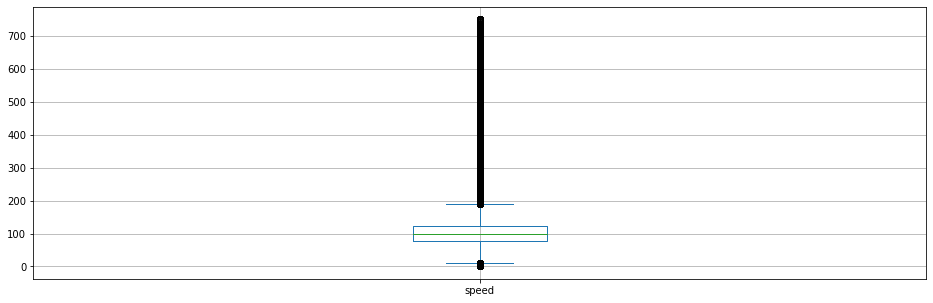

In [52]:
feds['speed'].plot.box(grid='True', figsize=(16,5))
# we have lot of outliers in speed probably becoz we have so many speeds which are 0 and less than 50.

In [53]:
# we can check for all speed above 200
feds[feds['speed'] > 200]

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency,geometry,Date,Month,year
174,A7A9D4,72709f0,34.55220,-117.88300,19500,218,101,4773,PC12,2015-08-18T01:29:00Z,...,7090551,PILATUS,PC-12/45,2004.0,4,dhs,POINT (-117.88300 34.55220),18,8,2015
202,A6718E,726c051,32.74101,-116.81800,4500,305,268,4414,C182,2015-08-18T00:24:13Z,...,2072703,CESSNA,182T,2010.0,4,fbi,POINT (-116.81800 32.74101),18,8,2015
203,A6718E,726c051,32.73530,-116.75599,4500,375,127,4414,C182,2015-08-18T00:23:41Z,...,2072703,CESSNA,182T,2010.0,4,fbi,POINT (-116.75599 32.73530),18,8,2015
235,AAFD01,726edcd,25.70341,-79.83859,7399,210,102,4407,DH8C,2015-08-18T00:11:30Z,...,1390043,BOMBARDIER INC,DHC-8-315,2009.0,5,dhs,POINT (-79.83859 25.70341),18,8,2015
277,A6718E,726c051,32.78240,-116.92000,4500,239,294,4414,C182,2015-08-17T23:54:23Z,...,2072703,CESSNA,182T,2010.0,4,fbi,POINT (-116.92000 32.78240),17,8,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449634,A15B00,810342e,45.06761,-92.47710,3416,312,88,1200,C182,2015-11-23T20:16:09Z,...,2073343,TEXTRON AVIATION INC,T206H,2015.0,4,fbi,POINT (-92.47710 45.06761),23,11,2015
449643,A15B00,810342e,44.95650,-92.58349,3424,205,226,1200,C182,2015-11-23T20:17:55Z,...,2073343,TEXTRON AVIATION INC,T206H,2015.0,4,fbi,POINT (-92.58349 44.95650),23,11,2015
449647,A15B00,810342e,44.98580,-92.49980,3425,227,292,0,C182,2015-11-23T20:05:08Z,...,2073343,TEXTRON AVIATION INC,T206H,2015.0,4,fbi,POINT (-92.49980 44.98580),23,11,2015
449657,A15B00,8097e0a,44.58420,-93.00470,2650,693,0,0,C182,2015-11-20T20:13:45Z,...,2073343,TEXTRON AVIATION INC,T206H,2015.0,4,fbi,POINT (-93.00470 44.58420),20,11,2015


In [54]:
# we have lot of columns with may be unrecorded speed . Considering minimum speed as 35 knots. 
# we may remove all the columns with less than 35 knots speed or we may leave it. 
feds[feds['speed'] == 0]

,adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,...,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency,geometry,Date,Month,year
31,A72AA1,72791e8,33.84731,-119.11600,6475,0,133,4401,B350,2015-08-18T07:36:54Z,...,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs,POINT (-119.11600 33.84731),18,8,2015
75,A72AA1,727763c,32.32780,-117.59000,6499,0,345,0,B350,2015-08-18T06:08:30Z,...,4220012,HAWKER BEECHCRAFT CORP,B300C,2010.0,5,dhs,POINT (-117.59000 32.32780),18,8,2015
76,A68BE9,72773c7,32.16711,-110.98900,4300,0,73,0,C182,2015-08-18T05:59:38Z,...,8680950,EUROCOPTER,AS 350 B2,1998.0,6,dhs,POINT (-110.98900 32.16711),18,8,2015
223,A120A0,726f5ed,47.64050,-122.12600,899,0,23,0,AS50,2015-08-18T00:15:39Z,...,8680954,EUROCOPTER,AS 350 B3,2004.0,6,dhs,POINT (-122.12600 47.64050),18,8,2015
1753,A83822,72666ad,38.72950,-77.51529,50,0,225,4414,B407,2015-08-17T19:51:23Z,...,1182154,BELL HELICOPTER TEXTRON CANADA,407,2012.0,6,fbi,POINT (-77.51529 38.72950),17,8,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449633,A15B00,80ffbbc,44.58311,-93.31620,2924,0,214,0,C182,2015-11-23T18:08:56Z,...,2073343,TEXTRON AVIATION INC,T206H,2015.0,4,fbi,POINT (-93.31620 44.58311),23,11,2015
449638,A15B00,8097e0a,44.57490,-93.31419,2750,0,0,0,C182,2015-11-20T20:09:56Z,...,2073343,TEXTRON AVIATION INC,T206H,2015.0,4,fbi,POINT (-93.31419 44.57490),20,11,2015
449642,A15B00,808907d,44.61370,-93.40229,3375,0,200,0,C182,2015-11-20T13:31:41Z,...,2073343,TEXTRON AVIATION INC,T206H,2015.0,4,fbi,POINT (-93.40229 44.61370),20,11,2015
449650,A15B00,7f92b66,44.50800,-93.96919,9350,0,127,0,C182,2015-11-13T20:35:14Z,...,2073343,TEXTRON AVIATION INC,T206H,2015.0,4,fbi,POINT (-93.96919 44.50800),13,11,2015


In [1]:
feds.head()


NameError: name 'feds' is not defined